# Exercise

 - Import possum.csv file
 - plot two graphics which describe your data, the most interessting you consider
 - Clean your data from missing, extrem or error data. if necessary
 - Transform your categorical variables into dummies
 - Divide your data into Training and Test
 - Scale/Standardize your continuous variables
 - Train your Linear Regression Model to predict the age of the animals
 - Validate your model using the test dataset, and justify your answer


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={"figure.figsize": (12.,5.)})

from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [57]:
possum = pd.read_csv('/content/drive/MyDrive/Basic Data Analytics/Data/3.-Regresion/possum.csv', sep = ';')
possum = pd.get_dummies(possum, columns=['Pop','sex'])
possum

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_Vic,Pop_other,sex_f,sex_m
0,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1,0,0,1
1,2,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1,0,1,0
2,3,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1,0,1,0
3,4,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1,0,1,0
4,5,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0,0,1,0,1
100,101,7,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0,0,1,0,1
101,102,7,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0,0,1,1,0
102,103,7,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0,0,1,0,1


In [58]:
possum = pd.concat([possum, possum, possum], axis = 0)

In [59]:
possum.dropna(inplace = True)

In [60]:
possum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 103
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       303 non-null    int64  
 1   site       303 non-null    int64  
 2   age        303 non-null    float64
 3   hdlngth    303 non-null    float64
 4   skullw     303 non-null    float64
 5   totlngth   303 non-null    float64
 6   taill      303 non-null    float64
 7   footlgth   303 non-null    float64
 8   earconch   303 non-null    float64
 9   eye        303 non-null    float64
 10  chest      303 non-null    float64
 11  belly      303 non-null    float64
 12  Pop_Vic    303 non-null    uint8  
 13  Pop_other  303 non-null    uint8  
 14  sex_f      303 non-null    uint8  
 15  sex_m      303 non-null    uint8  
dtypes: float64(10), int64(2), uint8(4)
memory usage: 32.0 KB


<Axes: xlabel='hdlngth', ylabel='age'>

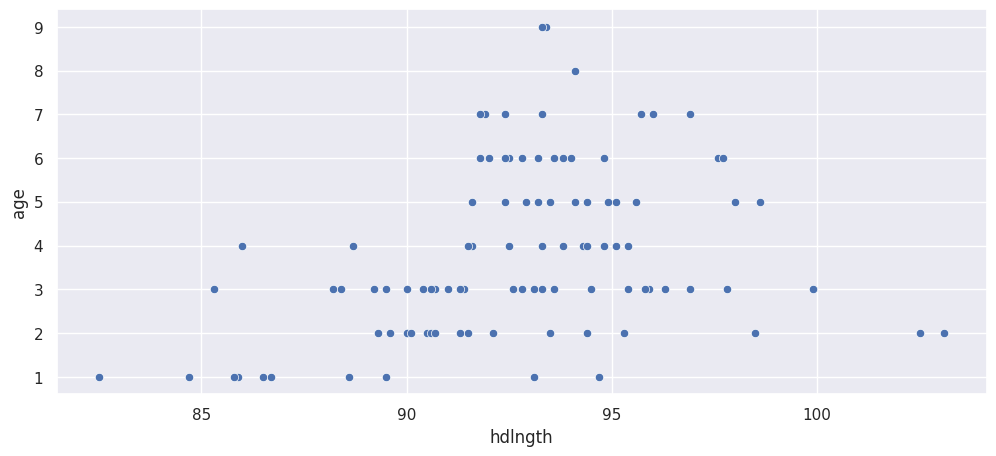

In [61]:
sns.scatterplot(data = possum, x = 'hdlngth',y = 'age')

<Axes: xlabel='age', ylabel='footlgth'>

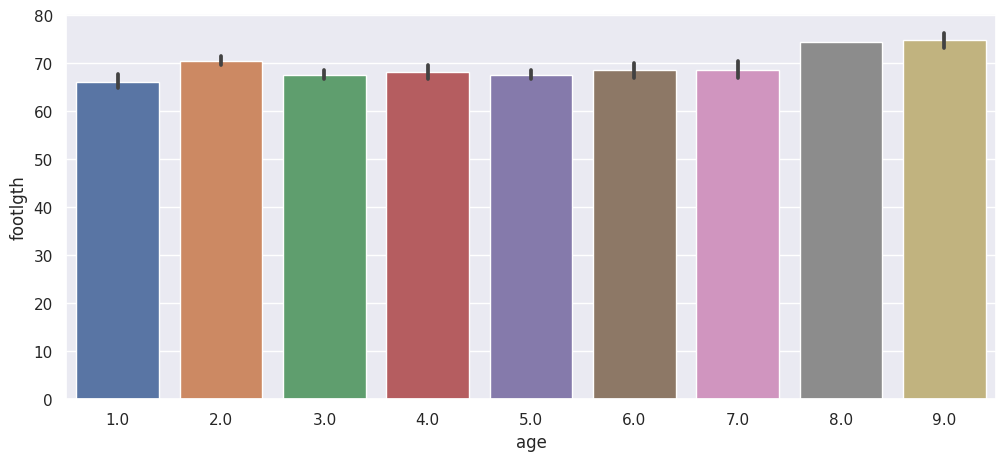

In [62]:
sns.barplot(data = possum, x = 'age', y = 'footlgth')

In [63]:
from sklearn.preprocessing import StandardScaler
# Selecciona las columnas que deseas normalizar
features_to_normalize = possum.drop(columns=['age','Pop_Vic','sex_f','sex_m','Pop_other'])

# Normaliza los datos seleccionados
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features_to_normalize)

# Crea un nuevo DataFrame con las características normalizadas
normalized_df = pd.DataFrame(normalized_features, columns=features_to_normalize.columns)
normalized_df['age']=possum['age'].values
normalized_df['Pop_Vic']=possum['Pop_Vic'].values
normalized_df['Pop_other']=possum['sex_f'].values
normalized_df['sex_f']=possum['Pop_other'].values
normalized_df['sex_m']=possum['sex_m'].values

print(normalized_df.head(10))

       case      site   hdlngth    skullw  totlngth     taill  footlgth  \
0 -1.701469 -1.135075  0.391091  1.114121  0.414441 -0.534944  1.389467   
1 -1.668599 -1.135075 -0.065889  0.207174  1.013103 -0.280089  0.934052   
2 -1.635728 -1.135075  0.362530  0.984557  1.970964  0.994189  1.594404   
3 -1.602857 -1.135075  0.134040  0.045219  1.132836  0.484478  1.753799   
4 -1.569986 -1.135075 -0.351501 -0.213909 -0.423687 -0.534944  0.592490   
5 -1.537116 -1.135075  0.105479 -0.699773  0.773638 -0.789800  1.093447   
6 -1.504245 -1.135075  0.733825  0.401520  0.534173 -0.534944  0.706344   
7 -1.471374 -1.135075  0.591019  0.207174  0.893371 -0.025233  0.979593   
8 -1.438503 -1.135075  0.191162 -0.213909  1.013103 -0.025233  0.911281   
9 -1.405632 -1.135075 -0.265817  0.336738  0.534173  0.229622  0.569720   

   earconch       eye     chest     belly  age  Pop_Vic  Pop_other  sex_f  \
0  1.575748  0.141928  0.465334  1.238441  8.0        1          0      0   
1  0.758956  0.90138

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_df[['hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly','Pop_Vic','Pop_other','sex_f','sex_m']], normalized_df['age'], train_size = 0.8, random_state = 0)

In [69]:
X_train.shape, y_train.shape

((242, 13), (242,))

In [70]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN, LSTM, Dropout
# creamos el modelo
model = Sequential()
model.add(Dense(20, input_shape=(13,), kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# compilamos el modelo
model.compile(loss='mean_squared_error', optimizer='adam')


In [71]:
history = model.fit(X_train, y_train, epochs=10, batch_size=5, validation_data=(X_test, y_test))

Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 17.6417 - val_loss: 17.9446
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 15.9717 - val_loss: 15.5463
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 13.0767 - val_loss: 11.9598
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 9.3109 - val_loss: 8.0599
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 6.0416 - val_loss: 5.5830
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 4.1078 - val_loss: 4.5652
Epoch 7/10
49/49 [==============================] - 0s 3ms/step - loss: 3.3571 - val_loss: 4.2353
Epoch 8/10
49/49 [==============================] - 0s 3ms/step - loss: 3.0888 - val_loss: 4.1103
Epoch 9/10
49/49 [==============================] - 0s 3ms/step - loss: 3.0255 - val_loss: 4.0509
Epoch 10/10
49/49 [==============================] - 0s 3ms/step - loss: 2.9605 - val_loss: 3.9354


In [76]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 3.9354


3.935368537902832

In [72]:
print('MAE test', metrics.mean_absolute_error(y_test,model.predict(X_test)) )
print('MAPE test', metrics.mean_absolute_percentage_error(y_test,model.predict(X_test)) )
print('MSE test' , metrics.mean_squared_error(y_test,model.predict(X_test)))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
print("R2: ", metrics.r2_score(y_test, model.predict(X_test)))

2/2 [==============================] - 0s 5ms/step
MAE test 1.5145800426358083
2/2 [==============================] - 0s 5ms/step
MAPE test 0.5537641582158962
2/2 [==============================] - 0s 5ms/step
MSE test 3.935368702623457
2/2 [==============================] - 0s 5ms/step
RMSE test 1.983776374146909
2/2 [==============================] - 0s 5ms/step
R2:  0.05097168227725979


In [73]:
model.predict(X_test).mean()

2/2 [==============================] - 0s 4ms/step


3.8757715

In [74]:
possum.age.mean()

3.8217821782178216

In [75]:
y_test.mean()

3.8688524590163933